In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import json

In [2]:
with open('/Users/nhu2000/projects/huizhou/data/stop_words/Baidu_Stop_Words.json') as data_file:    
    data = json.load(data_file)
bd_stop_words = list(data)

In [3]:
#df = pd.read_csv('/Users/nhu2000/projects/SimilarSearch/data/query/dsi_query_sim_v1.csv')
#df = pd.read_csv('/Users/nhu2000/projects/SimilarSearch/data/clean/huizhou-web-full_v1_2.csv')
df = pd.read_csv('/Users/nhu2000/projects/SimilarSearch/data/clean/huizhou-web-full_v1_2.csv')

In [4]:
df = df.dropna(subset =['content'])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8351 entries, 0 to 8350
Data columns (total 4 columns):
url            8351 non-null object
title          8351 non-null object
content        8351 non-null object
content_seg    8351 non-null object
dtypes: object(4)
memory usage: 326.2+ KB


l_df = df[df['target'] == 1]
l_df.info()

In [190]:
l_df['s_vec'] = l_df.s_vec_cnt.map(lambda x: map_unserialize(x))

/Library/Python/2.7/site-packages/ipykernel-4.5.2-py2.7.egg/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [59]:
l_df['s_words'] = l_df.s_vec.map(lambda x: ' '.join(x.keys()))

/Library/Python/2.7/site-packages/ipykernel-4.5.2-py2.7.egg/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [60]:
print l_df.iloc[1]['s_words']

内 旁有 天井 左为 壁上 融 意象 怪石 甚高 砖雕 工艺 宅 可谓 浮雕 小草 溪畔 色泽 徽州 竹梅 本身 不及 琼楼玉宇 成分 旅游 生产 宽 院墙 北岸 黄鼎 础 设计奖 口亭 一幅 堪称 立体感 野趣 雕饰 伸出 青 鬼斧神工 次年 艺人 凝瑞堂 技巧 宗祠 博古 奇松 休宁县 材料 一副 山鹿 大胆 动植物 石牌坊 叹 精品 装饰 省 石料 礅 占朴 青石 二是 为主 二 国画 戏珠 淙淙 建国 明显 墓葬 天国 题材 佛经 啼叫 衬以 前后 牌坊 具有 斜照 名字 坦西递 见方 厘米 采用 显出 各种 限制 徽派 茶园 宛若 从嶙刚 处 雕刻 保存 魅力 小鸟 八百里 坊 形象


In [173]:
m_df = df[(df['cluster_full'] == 1) | (df['cluster_full'] == 2) ]

In [6]:
articles = df['content_seg']
#articles = l_df['s_words']

In [7]:
#vectorizer = TfidfVectorizer(analyzer = 'word', stop_words = bd_stop_words)

vectorizer = TfidfVectorizer(stop_words = 'english', max_df=0.8, min_df=0.01, max_features=200000)
tfidf_matrix = vectorizer.fit_transform(articles)
terms = vectorizer.get_feature_names()

In [8]:
print tfidf_matrix.shape

(8351, 4395)


In [9]:
print tfidf_matrix.shape

(8351, 4395)


In [10]:
print terms[520]

交界


In [11]:
vocab_frame = pd.DataFrame({'words': terms})

In [12]:
vocab_frame.head(200)

,words
0,07937370999
1,10
2,100
3,1000
4,11
5,1121
6,12
7,120
8,1200
9,1217


In [13]:
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(tfidf_matrix)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8351 entries, 0 to 8350
Data columns (total 4 columns):
url            8351 non-null object
title          8351 non-null object
content        8351 non-null object
content_seg    8351 non-null object
dtypes: object(4)
memory usage: 326.2+ KB


In [28]:
from sklearn.cluster import KMeans
num_clusters = 9
km = KMeans(n_clusters=num_clusters)

In [29]:
km.fit(tfidf_matrix)
clusters = km.labels_.tolist()

In [30]:
df['cluster'] = clusters

In [31]:
#pd.value_counts(df_final['cluster'].values, sort=True)
df['cluster'].value_counts()

3    2540
4    1976
6     956
7     841
8     633
1     489
2     417
5     258
0     241
Name: cluster, dtype: int64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8351 entries, 0 to 8350
Data columns (total 5 columns):
url            8351 non-null object
title          8351 non-null object
content        8351 non-null object
content_seg    8351 non-null object
cluster        8351 non-null int64
dtypes: int64(1), object(4)
memory usage: 391.5+ KB


In [20]:
print len(clusters)

8351


In [21]:
order_centroids = km.cluster_centers_.argsort()[:, ::-1] 

for i in range(num_clusters):
    print("Cluster %d words:" % i)
    
    for ind in order_centroids[i, :20]: #replace 6 with n words per cluster
        print terms[ind]       
        #print(' %s' % vocab_frame.ix[terms[ind].split(' ')].values.tolist()[0][0].encode('utf-8', 'ignore'))
    print() #add whitespace
    print() #add whitespace
    

Cluster 0 words:
徽商
徽州
商人
经营
经商
商业
他们
扬州
盐商
商帮
发展
明清
经济
盐业
社会
歙县
一个
中国
新安
资本
()
()
Cluster 1 words:
分隔线
切肤之痛
吸附
变革时代
1217
手艺人
丰富
1880
多出
手艺
嘉定
自宋
文武
身处
清光绪
人人
状元
六年
道理
放在
()
()
Cluster 2 words:
徽州
建筑
歙县
新安
故园
黄山
一个
徽商
研究
历史
我们
徽派
中国
祠堂
绩溪
社会
发展
宗族
就是
木雕
()
()
Cluster 3 words:
婺源
旅游
本站
html
提供
联系
保护
光明
乡村
老师
我们
电话
评论
景区
旅游网
醉美
生态
住宿
由金桥
技术支持
()
()
Cluster 4 words:
中国
旅游
发展
历史
安徽
活动
保护
建设
传统
我们
黄山
一个
项目
徽州
华文
社会
工作
海外
学习
博物馆
()
()
Cluster 5 words:
中國
遺產
發展
傳統
非物質
中華
活動
保護
歷史
民族
台灣
藝術
產業
兩岸
社會
建設
一個
我們
旅遊
項目
()
()


In [22]:
print ind, vocab_frame.ix[terms[ind].split(' ')].values.tolist()

4296 [[nan]]


In [23]:
#Multidimensional scaling
import os  # for os.path.basename

import matplotlib.pyplot as plt
import matplotlib 

from sklearn.manifold import MDS


In [24]:
MDS()

# convert two components as we're plotting points in a two-dimensional plane
# "precomputed" because we provide a distance matrix
# we will also specify `random_state` so the plot is reproducible.
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)

pos = mds.fit_transform(dist)  # shape (n_components, n_samples)

xs_full, ys_full = pos[:, 0], pos[:, 1]
print()
print()

()
()


In [34]:
#set up colors per clusters using a dict
cluster_colors = {0: '#1b9e77', 1: '#d95f02', 2: '#7570b3', 3: '#e7298a', 4: '#66a61e',
                  5: '#fb9e77', 6: '#f95f02', 7: '#f570b3', 8: '#f7298a'#, 9: '#a4a4a4',
                 }

#set up cluster names using a dict
cluster_names = {0: 'Cluster 0', #u'徽文化', 
                 1: 'Cluster 1', 
                 2: 'Cluster 2', 
                 3: 'Cluster 3', 
                 4: 'Cluster 4',  #u'徽州',
                 5: 'Cluster 5', 
                 6: 'Cluster 6', 
                 7: 'Cluster 7', 
                 8: 'Cluster 9', 
                 }

In [26]:
xs = xs_full
ys = ys_full

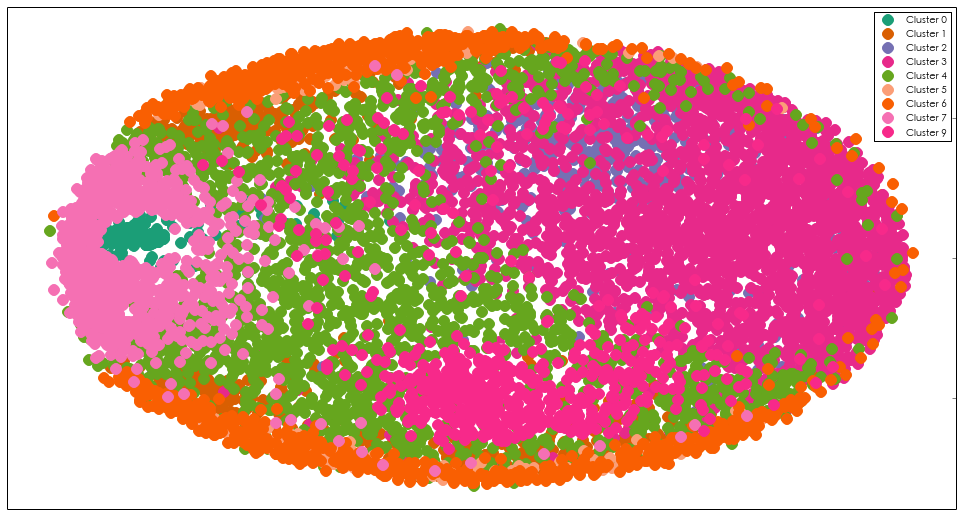

In [35]:
#some ipython magic to show the matplotlib plots inline
%matplotlib inline 

from matplotlib.font_manager import FontManager

myfont = matplotlib.font_manager.FontProperties(fname='/System/Library/Fonts/STHeiti Light.ttc')


#plt.rcParams['font.sans-serif'] = ['SimHei'] # 指定默认字体
plt.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题
    

#create data frame that has the result of the MDS plus the cluster numbers and titles
#df = pd.DataFrame(dict(x=xs, y=ys, label=clusters, title=titles)) 
#df_plot = pd.DataFrame(dict(x=xs, y=ys, label=clusters)) 
df_plot = pd.DataFrame(dict(x=xs_full, y=ys_full, label=clusters)) 


#group by cluster
groups = df_plot.groupby('label')

# set up plot
fig, ax = plt.subplots(figsize=(17, 9)) # set size
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

idx = 0
#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups:
    if 1: #idx == 1 or idx == 2: # or idx == 5:
        
        #ax.legend(prop=myfont)

        ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, 
                label=cluster_names[name], color=cluster_colors[name], 
                mec='none')
        ax.set_aspect('auto')
        ax.tick_params(\
            axis= 'x',          # changes apply to the x-axis
            which='both',      # both major and minor ticks are affected
            bottom='off',      # ticks along the bottom edge are off
            top='off',         # ticks along the top edge are off
            labelbottom='off')
        ax.tick_params(\
            axis= 'y',         # changes apply to the y-axis
            which='both',      # both major and minor ticks are affected
            left='off',      # ticks along the bottom edge are off
            top='off',         # ticks along the top edge are off
            labelleft='off')
    idx += 1 

#ax.legend(numpoints=1)  #show legend with only 1 point
ax.legend(numpoints=1, prop=myfont)  #show legend with only 1 point


#add label in x,y position with the label as the film title
#for i in range(len(df)):
#    ax.text(df.ix[i]['x'], df.ix[i]['y'], df.ix[i]['title'], size=8)  
#    ax.text(df.ix[i]['x'], df.ix[i]['y'], size=8)  #Not draw the titles

    
    
#plt.show() #show the plot

#uncomment the below to save the plot if need be
plt.savefig('clusters_small_noaxes-12.png')

from pylab import matplotlib,mpl
from matplotlib.font_manager import FontManager
import subprocess
import matplotlib.pylab as plt
import numpy as np

def show_available_font():
    fm = FontManager()
    mat_fonts = set(f.name for f in fm.ttflist)

    output = subprocess.check_output(
        'fc-list :lang=zh -f "%{family}\n"', shell=True)
    zh_fonts = set(f.split(',', 1)[0] for f in output.split('\n'))
    available = mat_fonts & zh_fonts

    print '*' * 10, '可用的字体', '*' * 10
    for f in available:
        print f

def test():
    myfont = matplotlib.font_manager.FontProperties(fname='/System/Library/Fonts/PingFang.ttc')
    mpl.rcParams['axes.unicode_minus'] = False
    pi = 3.1415926
    t = np.arange(-5*pi, 5*pi, 0.01)
    y = np.sin(t)/t
    plt.plot(t, y)
    plt.title(u'这里写的是中文',fontproperties=myfont) #指定字体
    plt.xlabel(u'X坐标',fontproperties=myfont)
    plt.ylabel(u'Y坐标',fontproperties=myfont)
    plt.show()


show_available_font()

In [ ]:
test()

In [ ]:
from sklearn.manifold import MDS
MDS()


dist = [[0.1, 0.5],
       [0.5, 0.1]]
# convert two components as we're plotting points in a two-dimensional plane
# "precomputed" because we provide a distance matrix
# we will also specify `random_state` so the plot is reproducible.
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)

pos = mds.fit_transform(dist)  # shape (n_components, n_samples)

xs, ys = pos[:, 0], pos[:, 1]
print()
print()

In [14]:
print xs, ys

[ 0.17654697 -0.17654697] [ 0.17700613 -0.17700613]


In [88]:
df.head(200)

,url,title,content,content_seg,cluster
0,http://cul.anhuinews.com/system/2016/11/21/007...,徽州民歌传人操明花校园授艺,近日，省非物质文化遗产徽州民歌传承人操明花前往休宁县海阳二小、歙县城关小学和徽州区岩寺镇中心...,近日 ， 省非 物质 文化遗产 徽州 民歌 传承 人操 明花 前往 休宁县 海阳 二小 、 ...,0
1,http://cul.anhuinews.com/system/2016/01/26/007...,徽派雕刻——徽州木雕艺术,徽州民居、家具木板和圆木雕刻艺术的简称。木雕在旧属徽州各县分布之广在全国屈指可数，宅院内的屏...,徽州 民居 、 家具 木板 和 圆木 雕刻 艺术 的 简称 。 木雕 在 旧属 徽州 各县 ...,0
2,http://cul.anhuinews.com/system/2016/01/26/007...,徽派雕刻——徽州石雕艺术,传统“徽州四雕”之一。在徽州城乡布很广，类别亦多，主要用于寺宅的廊柱、门墙、牌坊、墓葬等处的...,传统 “ 徽州 四雕 ” 之一 。 在 徽州 城乡 布 很 广 ， 类别 亦 多 ， 主要 ...,0
3,http://cul.anhuinews.com/system/2016/01/26/007...,徽州古民居雕刻装饰研究,徽州因明清两朝的繁盛而在历史上留下浓墨重彩的一笔，建筑就是那个时代的重要表现之一。当时的徽商...,徽州 因 明清 两朝 的 繁盛 而 在历史上 留下 浓墨重彩 的 一笔 ， 建筑 就是 那个...,0
4,http://cul.anhuinews.com/system/2014/07/11/006...,徽州为什么称为“文献之邦”,徽州作为极具特色的地域文化区，在宋代就已经基本形成。明代以来徽商迅速崛起，更加有力的推动了教...,徽州 作为 极具 特色 的 地域 文化区 ， 在 宋代 就 已经 基本 形成 。 明代 以来...,0
5,http://cul.anhuinews.com/system/2014/07/07/006...,华夏文明的圣火——皋陶文化,“五帝、三王、皋陶、孔子，人之圣也。”皋陶与尧、舜、禹齐名被后人尊为“上古四圣”。唐玄宗以李...,“ 五帝 、 三王 、 皋陶 、 孔子 ， 人之圣 也 。 ” 皋陶 与 尧 、 舜 、 禹...,1
6,http://cul.anhuinews.com/system/2014/06/26/006...,安徽省非物质文化遗产：砖雕、石雕、木雕,"古代徽州辖地包括今天的安徽省黄山市和江西省婺源县。""徽州三雕""为古代徽州地区明清建筑的装饰性...","古代 徽州 辖 地 包括 今天 的 安徽省 黄山市 和 江西省 婺源县 。 "" 徽州 三雕 ...",0
7,http://cul.anhuinews.com/system/2014/06/26/006...,徽州文化中的烟文化,徽州文化的内容包罗万象，如徽州土地制度、徽商、徽州历史名人、徽州科技、新安理学、新安医学、徽...,徽州 文化 的 内容 包罗万象 ， 如 徽州 土地 制度 、 徽商 、 徽州 历史名人 、 ...,0
8,http://cul.anhuinews.com/system/2014/06/19/006...,徽州的天井文化,走进徽州静谧的古村落，仰看峰头丛林滴翠，俯听涧底细语泉声，脚踏流金岁月蚀磨的石板，穿过似乎与...,走进 徽州 静谧 的 古村落 ， 仰看 峰头 丛林 滴翠 ， 俯听 涧 底细 语泉声 ， 脚...,0
9,http://cul.anhuinews.com/system/2014/06/19/006...,马头墙内外的徽州女人,安徽南端的徽州地域，黄山白岳新安江山水秀美，在蓝天白云绿水青山掩映之中，徽州古村落高低起伏、...,安徽 南端 的 徽州 地域 ， 黄山 白岳 新安江 山水 秀美 ， 在 蓝天白云 绿水青山 ...,0


In [38]:
class Toolbox (object):
    def __init__(self):
        self.init = 1
        
    def sort_dict (self, d, max=50):
        t = sorted(d.items(), key=lambda x: (-x[1], x[0]))
        return t[:max]
    
    def add_dict (self, x, y):
        d = { k: x.get(k, 0) + y.get(k, 0) for k in set(x) | set(y) }
        return d
    
    def create_dict(self, k1, v1, filters = True):
        if filters == True:
            k1_list0 = k1.strip('()').split(',')
            v1_list0 = v1.strip('()').split(',')
            #print v1_list0
            #print k1_list0
            k1_list1 = filter(None, k1_list0)        
            v1_list1 = filter(None, v1_list0)
        else:
            k1_list1 = k1
            v1_list1 = v1
        
        #print ' '.join(k1_list1)
        k2_list1 = [item.decode('utf-8') for item in k1_list1]
        v2_list1 = [float(item) for item in v1_list1]

    def create_vec(self, k1, v1):
        return (zip(k1, v1))
    
    def get_dict_top_n(self, d, max=50):
        ret = self.sort_dict(d, max)
        words, fq = zip(*ret)
        sum_up = sum(fq)
        fq_normalized = tuple(item/sum_up for item in fq)
        
        return dict(zip(words, fq_normalized))
    
    #calculate cosine between two dictionaries
    def get_sim(self, vec1, vec2):
        
        #get intersection
        intersection = set(vec1.keys()) & set(vec2.keys())
        
        #print intersection
        numerator = sum([vec1[x] * vec2[x] for x in intersection])

        #print 'num ---', numerator
        #print vec1.keys()
        #print vec1.values()
        #print vec2.keys()
        #print vec2.values()        
        
        sum1 = sum([vec1[x]**2 for x in vec1.keys()])
        sum2 = sum([vec2[x]**2 for x in vec2.keys()])
        denominator = math.sqrt(sum1) * math.sqrt(sum2)

        if not denominator:
            return 0.0
        else:
            return float(numerator) / denominator
        
    def sum_vects(self, vects):
        sum_vects = None
        for vec in vects:
            if sum_vects == None:
                sum_vects = vec
            else:
                sum_vects = self.add_dict(sum_vects, vec)
        #only return first 100 after additions
        #print type(sum_vecs)
        return self.get_dict_top_n(sum_vects)
    
    def unserialized(self, x, eval_val=True):
        #print '----- in'
        #print x
        d = dict()
        s = x.strip('{}')
        #s = s.strip('[]')
        ret = s.split(',')

        #print ret
        for t in ret:
            r = t.split(':')
            #print r[0], r[1]
            key = eval(r[0].decode('utf-8'))
            if eval_val == True:
                d[key] = float(r[1])
            else:
                d[key] = r[1]
        #print len(ret)
        #print 'split -----'
        #print ' '.join(ret)
        return d
        
    def get_centroid_df(self, check, num=4000):        
        if len(check) > num:
            #sampling     
            ratio = num*1.0/len(check)
            print 'ratio ---', ratio 
            msk = np.random.rand(len(check)) < ratio
            tmp = check[msk]
            check = tmp
    
        check.info()
        check_vecs = check['s_vec']
        return self.sum_vects(check_vecs) 
    
    def set_contained_flag(self, x, y):
        x_keys = x.keys()
        y_keys = y.keys()
        for s in y_keys:
            if s in x_keys:
                return True
        return False

In [40]:
aT = Toolbox()

In [ ]:
k_df = l_df[l_df['cluster'] == 4]
centroid_vec = aT.(k_df, 's_check')

In [48]:
def map_unserialize (x, eval_val = False):
    #print '----- in'
    #print x
    d = dict()
    s = x.strip('{}')
    #s = s.strip('[]')
    ret = s.split(',')
    
    #print ret
    idx = 0
    for t in ret:
        if idx < 100:
            r = t.split(':')
            #print r[0], r[1]
            key = eval(r[0].decode('utf-8'))
            d[key] = float(r[1])
            idx +=1
    #print len(ret)
    #print 'split -----'
    #print ' '.join(ret)
    return d